# Introduction
Creditworthiness is the parameter that decides whether a person or company will be considered to be worthy or deserving to be given financial credit for certain period of time based on their previous repayment history.

Financial institutions uses credit score for evaluating and quantifying to decide that an applicant is worthy to be given credit.

The worth obtained using creditworthiness is used to decide the interest rates on credit and credit limit (the amount to be sanctioned) for the existing borrower.

# Objective
The objective here is to build a model to 
1. To take credit decisions based on individual characteristics
2. To give an early warning to potential credit defauls 

## Importing important libraries
Here we are going to import the import libraries used for my project. The basic libraries are Pandas, Numpy, Sklearn, Mathplotlib etc. Initially, we have a notion of deciding whether a borrower is worthy or not. So, we can say that here we are going to address classification problem. So, I also imported Logistic regression model from Scikit learn. Logistic regression is a model which is used when our output class is binary (discrete). Logistic regression is used to model the probability of each class.

Also, we need to evaluate the performance of our model, so I have imported metric from Scikit learn.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

The Seaborn is a Python library for data visualization based on matplotlib. So, it is good to use it here.

In [2]:
import seaborn as sns

## Getting familiar with data
Importing the data and doing preliminiary analysis

In [3]:
df = pd.read_excel('CreditWorthiness.xlsx',sheet_name='Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

It looks like the data has no NAN values. Therefore, there is no need for NAN value removal and data imputation. The target variable seems to be credit score.

The data has six numerical and 15 categorical variables. 
Looking top ten entries to see whether the data has any special characters

The variable description is given below

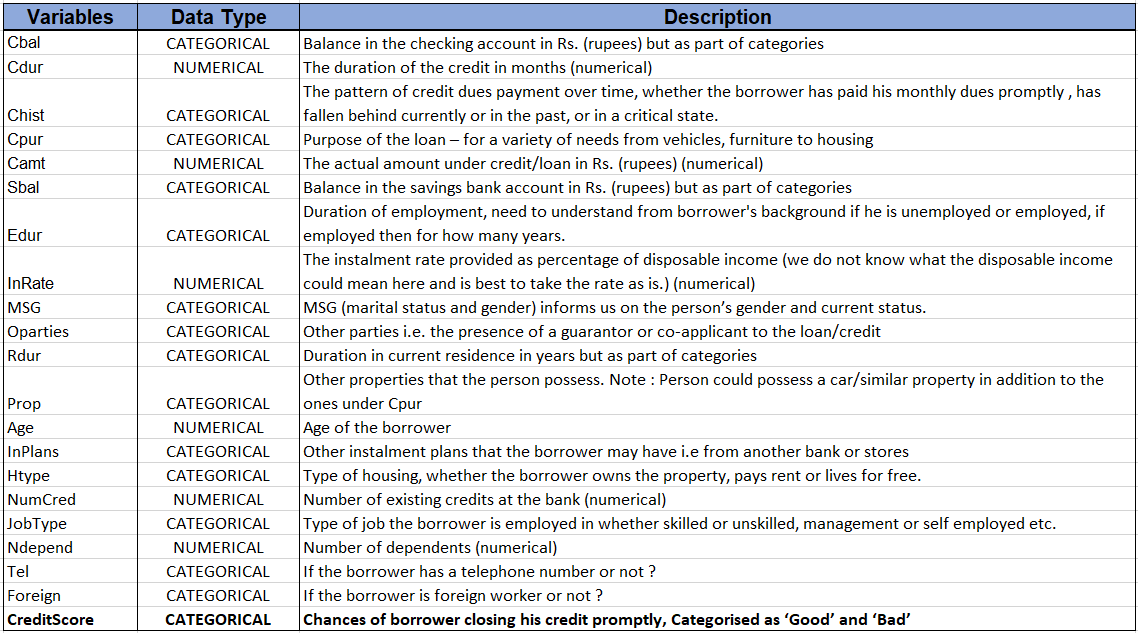

The glipmse of data is given below containing five top rows

In [4]:
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


The glimse of data containing the last five rows of dataset

In [5]:
df.tail()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
995,no checking account,6,all settled,second hand vehicle,7710,no savings account,1 to 4 years,1,single male,"yes, guarantor",...,real estate,26,stores,own,1,resident unskilled,2,no,no,good
996,0 <= Rs. < 2000,12,all settled till now,electronics,64560,no savings account,not employed,2,single male,no one,...,Unknown,52,none,own,1,"employed either in management, self or in high...",1,yes,no,bad
997,no checking account,36,dues not paid earlier,electronics,95540,Rs. < 1000,1 to 4 years,2,divorced or separated or married female,no one,...,Other cars etc.,31,stores,own,2,employee with official position,1,no,no,good
998,Rs. >=2000,18,all settled till now,second hand vehicle,19490,Rs. < 1000,more than 7 years,3,divorced or separated or married female,no one,...,Other cars etc.,23,none,own,1,"employed either in management, self or in high...",1,no,no,good
999,Rs. < 0,36,dues not paid earlier,furniture,62170,Rs. < 1000,less than 1 year,4,divorced or separated or married female,"yes, co-applicant",...,Unknown,23,none,pays rent,2,resident unskilled,1,yes,no,bad


The heatmap given below will give the relation of Credit score with numerical variables

[Text(0, 0.5, 'Cdur'),
 Text(0, 1.5, 'Camt'),
 Text(0, 2.5, 'InRate'),
 Text(0, 3.5, 'age'),
 Text(0, 4.5, 'NumCred'),
 Text(0, 5.5, 'Ndepend')]

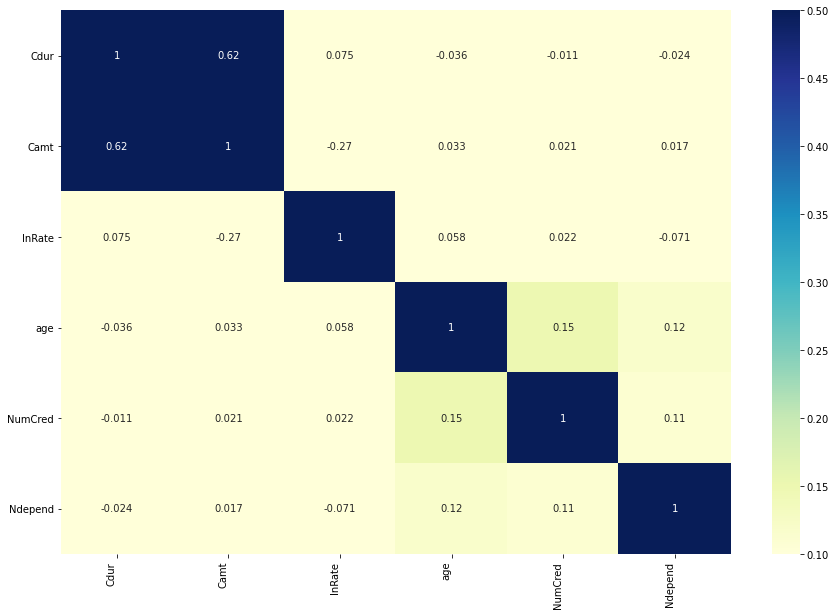

In [6]:
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,vmin=0.1,vmax=0.5,cmap="YlGnBu")
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

The five number summary of numerical variables of dataset is given below

In [7]:
df.describe()

,Cdur,Camt,InRate,age,NumCred,Ndepend
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,32592.58000,2.973000,35.546000,1.407000,1.155000
std,12.058814,28227.36876,1.118715,11.375469,0.577654,0.362086
min,4.000000,2380.00000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,13535.00000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,23075.00000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,39602.50000,4.000000,42.000000,2.000000,1.000000
max,72.000000,184120.00000,4.000000,75.000000,4.000000,2.000000


The statistical summary of categorical variables of dataset is given below

In [8]:
df.describe(include='object')

,Cbal,Chist,Cpur,Sbal,Edur,MSG,Oparties,Rdur,Prop,inPlans,Htype,JobType,telephone,foreign,creditScore
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,4,10,5,5,4,3,4,4,3,3,4,2,2,2
top,no checking account,all settled till now,electronics,Rs. < 1000,1 to 4 years,single male,no one,more than 3 years,Other cars etc.,none,own,employee with official position,no,no,good
freq,394,618,280,603,339,548,907,413,332,814,713,630,596,963,700


Let us see how many bad or good  credit score are there

In [9]:
df.groupby('creditScore').size()

creditScore
bad     300
good    700
dtype: int64

There are 300 people with bad credit score and 700 people with good credit score. Hard encoding bad as zero and good as one.

<AxesSubplot:xlabel='creditScore', ylabel='age'>

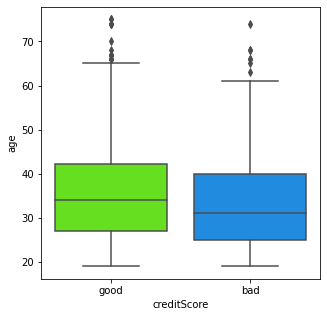

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(df["creditScore"],df["age"],palette="gist_rainbow")

This graphs shows that older people have good credit score

If the installment rate is lower than 

<AxesSubplot:xlabel='creditScore', ylabel='Cdur'>

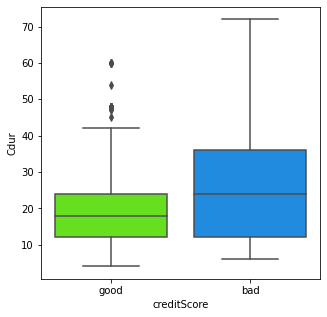

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(df["creditScore"],df["Cdur"],palette="gist_rainbow")

The borrowers with higher duration of credit has bad credit score

<AxesSubplot:xlabel='creditScore', ylabel='Camt'>

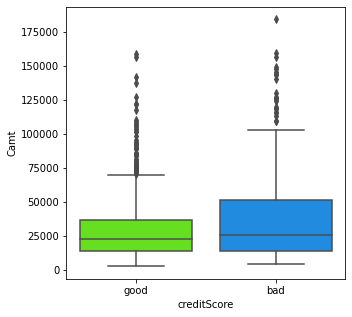

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(df["creditScore"],df["Camt"],palette="gist_rainbow")

The borrower with larger amount of credit have bad credit score

In [13]:
df['creditScore']=df['creditScore'].map({'bad':0, 
                         'good':1})

Encoding categorical variables into dummy variables

In [14]:
X = pd.get_dummies(df)

In [15]:
df_columns_list=list(X.columns)

In [27]:
# Separating the input names from species
features=list(set(df_columns_list)-set(['creditScore']))

### Separating dependent and independent varriables

In [17]:
# Storing the output values in y
target=list(['creditScore'])
y=X[target].values

In [18]:
Xf=X[features]
Xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   JobType_employee with official position                          1000 non-null   uint8
 1   Camt                                                             1000 non-null   int64
 2   Edur_more than 7 years                                           1000 non-null   uint8
 3   Cpur_retaining                                                   1000 non-null   uint8
 4   JobType_non resident either unemployed or  unskilled             1000 non-null   uint8
 5   Cpur_electronics                                                 1000 non-null   uint8
 6   telephone_yes                                                    1000 non-null   uint8
 7   Ndepend                                                      

In [19]:
x = X[features].values

### The data is split into train and test data and standardization to have zero mean and unit variance

In [20]:
# Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split( x, y, test_size=0.25, random_state=0)


# Data scaling
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_x)

StandardScaler()

In [21]:
# Apply transform to both the training set and the test set.
train_x = scaler.transform(train_x)

test_x = scaler.transform(test_x)

### I prefer logistic regression model to classify the output as good or bad
The logistic regression model is built and output are predicted using the built model

In [22]:
# Make an instance of the Model
logistic = LogisticRegression(penalty='l1', tol=0.01, solver='saga')

# Fitting the values for x and y
logistic.fit(train_x/np.std(train_x,0),train_y)
print(logistic.coef_)

[[-6.88097429e-02 -3.20249009e-01  1.03288139e-02  1.01719817e-03
   0.00000000e+00  1.11509349e-01  6.23036300e-02 -3.20117781e-02
  -2.45043611e-02  1.05412303e-01 -9.19305200e-02 -6.23036300e-02
  -4.52261762e-06  3.20413947e-02  0.00000000e+00 -9.10946814e-02
  -6.60994356e-05  2.33987140e-01 -1.08010836e-01  1.75118968e-01
  -5.21779342e-06 -3.83477047e-01 -4.44574717e-02 -2.61836342e-01
  -2.86299544e-01  1.55575936e-02 -3.17998922e-01  3.01846919e-01
   1.98479219e-01 -3.27992715e-02  1.46024413e-02  6.41877430e-02
  -6.51837877e-02 -1.65725645e-01  1.92225711e-01 -2.03650653e-01
  -1.37967401e-01 -8.66670782e-02 -8.77632031e-02  2.39380035e-01
   2.83984116e-02  1.08010836e-01 -7.06496106e-02  3.92654940e-05
   2.63174850e-01 -6.61916682e-02  2.11085276e-01  4.32093383e-03
  -1.78730474e-01  4.21490423e-01 -2.33044380e-02 -2.73939348e-01
  -1.43604268e-01  6.80248969e-02 -8.83088999e-02 -5.46753717e-03
   2.77630110e-04 -3.25738814e-02  9.78232502e-02 -1.29798754e-01
   1.46093

In [23]:
# Prediction from test data
prediction = logistic.predict(test_x)

### The evaluation metric used are confusion matrix

The accuracy is obtained and shown

In [24]:
# Confusion matrix
confusion_matrix = confusion_matrix(prediction,test_y)
print(confusion_matrix)

# Calculating the accuracy
accuracy_score=accuracy_score(prediction,test_y)
print(accuracy_score)

[[ 40  20]
 [ 37 153]]
0.772


It become really tough to say that the model is very good as the accuracy is 77.2%

In [25]:
# Calculating the f1_score
f1_score=f1_score(prediction,test_y)
print(f1_score)

0.8429752066115701


But, if we look the $F_1$ score then we can say that our basic model is really good[](http://)

In [26]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 25010


# Conclusion
In the above study we have used the logistic regression model for classifying the bad or good credit score. Though, we can explore more models for classification but I am limiting myself because Logistic regression is the simplest model for classification and we are getting good results here. 

We have classified credit score as good or bad for the dataset available